In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import os

In [2]:
df_covid = pd.read_csv('dataset/owid/owid-covid-data.csv')
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [14]:
df_covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [25]:
df_covid_china = df_covid[df_covid['iso_code'] == "CHN"]
# df_covid_china['date'] = df_covid_china['date'].astype('datetime64')
df_covid_china['date'] = pd.to_datetime(df_covid_china['date'], format='%Y-%m-%d')
df_covid_china = df_covid_china[df_covid_china['date'] >= '2021-01-01']
df_covid_china.tail()

<ipython-input-25-ec1963dfc27a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_china['date'] = pd.to_datetime(df_covid_china['date'], format='%Y-%m-%d')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
29940,CHN,Asia,China,2022-01-07,103454.0,159.0,162.857,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
29941,CHN,Asia,China,2022-01-08,103619.0,165.0,159.143,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
29942,CHN,Asia,China,2022-01-09,103776.0,157.0,158.571,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
29943,CHN,Asia,China,2022-01-10,103968.0,192.0,161.000,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
29944,CHN,Asia,China,2022-01-11,104189.0,221.0,179.571,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


<AxesSubplot:>

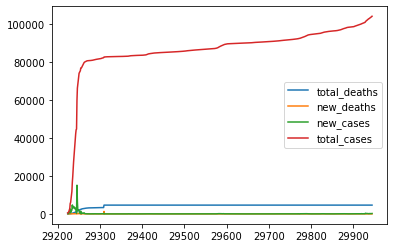

In [11]:
df_covid_china[['total_deaths','new_deaths','new_cases','total_cases']].plot.line()